### Regression exercise

Today, we will fit different polynomial regression to randomly generated data and explore how our loss function behaves. We will use the formulas, introduced in the theoretical sections and create a linear regression model from scratch. 


In [3]:
import pandas as pd
import numpy as np

import random
import matplotlib.pyplot as plt

#### Task 1

Write a function psi(x,m) defined as $\psi(x)=[1, x, x ^2, ..., x^m]$

In [97]:
def psi(x,m):
    psi = []
    for i in range(m+1):
        psi.append(x**i)
    return np.array(psi)
    

In [98]:
psi(2,4)

array([ 1,  2,  4,  8, 16])

#### Task 2

Write a function $h(x,\alpha, m)$ defined as $h(x,\alpha, m)=\alpha^T\psi(x, m)$

In [99]:
def h(x,alpha, m):
    return(alpha.T.dot(psi(x,m)))


In [7]:
alpha = np.array([1,2,3,4,5])
x= 2
m = 4

h(x,alpha,m)

129

In [95]:
# 

#### Task 3
Create a random 3rd order polynomial (we call it p3)

In [10]:
# random_num = random.randrange(100)

p3 = np.poly1d([1,-3, 2,-1])
p3([2,4])

array([-1, 23])

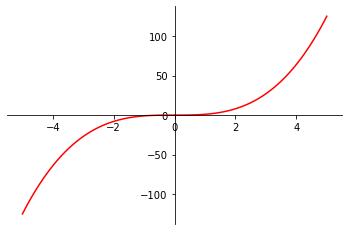

In [109]:
x = np.linspace(-5,5,100)

# the function, which is y = x^3 here
y = x**3

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

#### Task 4
Choose an interval [a,b], on which the polynomial is S-shaped.

In [108]:
# import matplotlib.pyplot as plt
# x = np.array([0,1,2,3, 4, 5,6])
# y = x**3

# # a line plot
# plt.plot(x,y,'red')
# plt.title('3rd order polynomial')
# plt.xlabel('x')
# plt.ylabel('p3')
# plt.show()

In [15]:
# choose 
a=-4
b =4

#### Task 5
Sample 30 random values in [a,b] and stored them in `xs`.

In [40]:
xs = []
for i in range(30):
    xs.append(random.uniform(a, b))
xs

[-1.8864582591180223,
 -3.3447927236640265,
 3.1809105384942615,
 2.761556963894577,
 -3.124771637688222,
 0.2083814114901159,
 0.40167855650928264,
 2.6741739168362697,
 -0.8652134379745755,
 -3.0914891835595872,
 -1.7593407952559685,
 -1.420297384613149,
 0.8278047152975061,
 3.377160598733022,
 3.128363974468523,
 -1.0088105102508669,
 -3.908160675906611,
 -3.1098945302784484,
 2.755342111413121,
 3.9142542616848353,
 3.0817543490355046,
 -3.030950288237168,
 0.7145684520587761,
 -1.394196648478034,
 0.07598869198155445,
 1.9860748236763985,
 -0.6772885952374956,
 3.1117482527881943,
 -2.5302898733742483,
 -3.8946394095446495]

#### Task 6
For each x in xs, compute p3(x) and store them as `ys`.

In [41]:
ys = p3(xs)



In [18]:
ys

array([  0.53356297,  -0.88826805, -84.25620829, -30.24790812,
        -1.00776228, -51.49742742,  -0.83205   ,  -4.07260485,
        -7.94977357,  -1.1786693 , -41.36306154,  -0.73413762,
        -0.98521156,   4.78498601,   8.62165726, -26.37306855,
        -0.61520705, -25.76679676,  -1.19494422,  -0.95938238,
        -2.5594145 ,  -0.88544578, -13.40129821,  -6.88469183,
        -1.13096979,  22.9571891 ,  -1.05808533, -30.54399658,
        -2.95942607, -52.18963653])

#### Task 7:
Plot `ys` against `xs` on [a,b]. Does it look like a third order polynomial?

In [58]:
plot_df = pd.DataFrame({'xs': xs, 'ys':ys})
plot_df = plot_df.sort_values('xs')

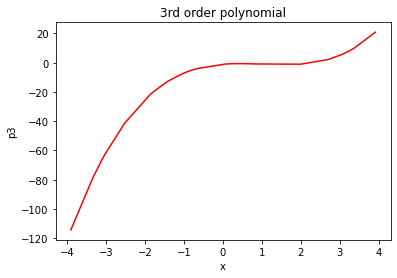

In [59]:
x = plot_df['xs']
y = plot_df['ys']

# a line plot
plt.plot(x,y,'red')
plt.title('3rd order polynomial')
plt.xlabel('x')
plt.ylabel('p3')
plt.show()

## Fitting the data

We will try to fit the data by a polynomial of order m=2. 

#### Task 8:

Using xs and psi, create the matrix X defined as 

<img src="matrixX.png">

In [100]:
# create shape first using zeros, then iterate through - need m+1 for 0 row
# one row for each order
# note - would need to convert to list if xs was a np array

# Use this to predict the y2
def create_X(m, xs):
    x = np.zeros([m+1, len(xs)])
    for i in range(len(xs)):
        x[:,i] = psi(xs[i],m)
    return x

In [122]:
X = create_X(2,xs)
# X

In [123]:
X.shape


(3, 30)

#### Task 9
Compute the optimal $\alpha$ using the expression $\alpha = (XX^T)^+Xy$ where $(XX^T)^+$ is the pseudoinverse matrix. y is our `ys` from the Task 6.

In [124]:
# THESE ARE THE coeffiencnts or the polynomial 
# ALSO FIND THIS WITH
# np.linalg.pinv(x)

alpha =np.dot(np.dot(np.linalg.inv(np.dot(X, X.transpose())),X), ys)
alpha.shape

(3,)

#### Task 10
Plot the data and the computed polynomial. Does it fit?

In [144]:
# xs

In [125]:
# make predictions by iterating through each element in xs and predict y2 using 3 alphas and xs

# REALLY SHOULD BE GETTING NEW RANDOM VALUES

y2 =[]
for i in range(len(xs)):
    y2.append(h(xs[i],alpha, 2))

In [106]:
len(y2)

30

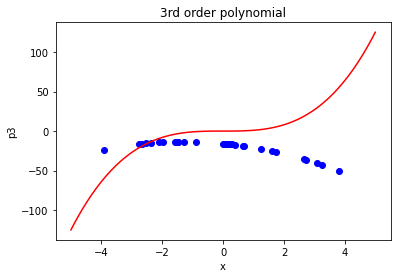

In [126]:
# x = x
# y
# y = plot_df['ys']

y2 = y2

# a line plot
plt.plot(x,y,'red')
plt.scatter(xs,y2,color='blue')
plt.title('3rd order polynomial')
plt.xlabel('x')
plt.ylabel('p3')
plt.show()

#### Task 11
Repeat the process for m=3,…,10. What do you observe?

In [78]:
# print(y3, y4)

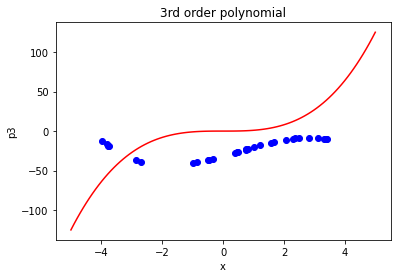

In [135]:
xs = []
for i in range(30):
    xs.append(random.uniform(a, b))
xs

X = create_X(3,xs)
alpha =np.dot(np.dot(np.linalg.inv(np.dot(X, X.transpose())),X), ys)
y3 =[]
for i in range(len(xs)):
    y3.append(h(xs[i],alpha, 3))

x = np.linspace(-5,5,100)

y = x**3


# a line plot
plt.plot(x,y,'red')

plt.scatter(xs,y3,color='blue')

plt.title('3rd order polynomial')
plt.xlabel('x')
plt.ylabel('p3')
plt.show()

In [131]:
# X

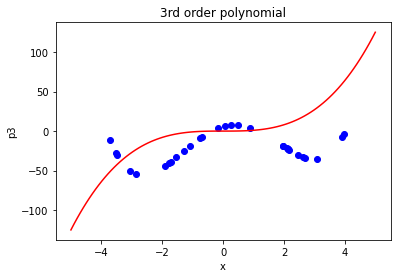

In [136]:
xs = []
for i in range(30):
    xs.append(random.uniform(a, b))

X = create_X(4,xs)
alpha =np.dot(np.dot(np.linalg.inv(np.dot(X, X.transpose())),X), ys)
y4 =[]
for i in range(len(xs)):
    y4.append(h(xs[i],alpha, 4))

x = np.linspace(-5,5,100)
y = x**3
# a line plot
plt.plot(x,y,'red')
plt.scatter(xs,y4,color='blue')

plt.title('3rd order polynomial')
plt.xlabel('x')
plt.ylabel('p3')
plt.show()

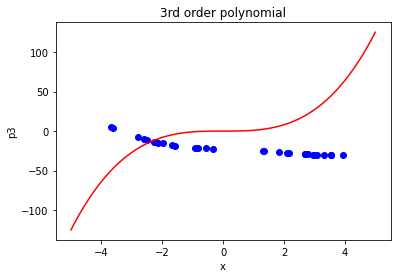

In [139]:
xs = []
for i in range(30):
    xs.append(random.uniform(a, b))

X = create_X(5,xs)
alpha =np.dot(np.dot(np.linalg.inv(np.dot(X, X.transpose())),X), ys)
y5 =[]
for i in range(len(xs)):
    y5.append(h(xs[i],alpha, 5))

x = np.linspace(-5,5,100)
y = x**3


y5=y5


# a line plot
plt.plot(x,y,'red')

plt.scatter(xs,y5,color='blue')

plt.title('3rd order polynomial')
plt.xlabel('x')
plt.ylabel('p3')
plt.show()

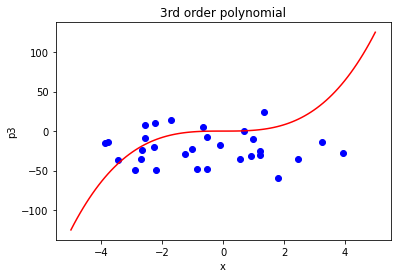

In [143]:
xs = []
for i in range(30):
    xs.append(random.uniform(a, b))

X = create_X(6,xs)
alpha =np.dot(np.dot(np.linalg.inv(np.dot(X, X.transpose())),X), ys)

y6 =[]
for i in range(len(xs)):
    y6.append(h(xs[i],alpha, 6))

xs = []
for i in range(30):
    xs.append(random.uniform(a, b))

x = np.linspace(-5,5,100)
y = x**3


# a line plot
plt.plot(x,y,'red')

plt.scatter(xs,y6,color='blue')
plt.title('3rd order polynomial')
plt.xlabel('x')
plt.ylabel('p3')
plt.show()

#### Task 12
Plot the value of the loss (defined as $ l(\alpha^Tx, y) = \sum(\alpha^Tx - y)^2 $  ) for m=2,…,10. y is our `ys` from the Task 6. What do you observe? Could you tell the optimal m from the plot?

In [95]:
def value_loss(A):
    losses=[]
    for i in range(len(alpha_vals)):
        pred = alpha_vals[i]
        actual = ys[i]
        loss_val = (pred - actual)**2
        losses.append(loss_val)
        
    total_loss = sum(losses)
    return(total_loss)

In [ ]:
# loss_counts = []

# for i in range(2,11):
#     